In [4]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Fonction sigmoïde (utilisée pour le modèle de régression logistique)
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# Constante pour éviter log(0) lors du calcul de la perte
epsilon = 1e-15 

print("Toutes les librairies (sympy, numpy, pandas, matplotlib, sklearn) ont été importées avec succès.")

Toutes les librairies (sympy, numpy, pandas, matplotlib, sklearn) ont été importées avec succès.


In [8]:
print("="*60)
print("PARTIE 1: GRADIENT DE L'ENTROPIE CROISÉE BINAIRE")
print("="*60)

# Définition des symboles : y (vraie valeur), y_hat (prédiction)
y, y_hat = sp.symbols('y y_hat', real=True)

# Fonction de perte BCE pour une observation L(y, ŷ)
L = -(y * sp.log(y_hat) + (1 - y) * sp.log(1 - y_hat))

print("\n1. Fonction de perte BCE L(y, ŷ) :", L)

# Calcul du gradient par rapport à y_hat
gradient = sp.diff(L, y_hat)
gradient_simplified = sp.simplify(gradient)

print("\n2. Gradient symbolique ∂L/∂ŷ (simplifié) :", gradient_simplified)

print("\nINTERPRÉTATION : $\\frac{\\partial L}{\\partial \\hat{y}} = \\frac{\\hat{y} - y}{\\hat{y}(1 - \\hat{y})}$")
print("Le terme $1/[\\hat{y}(1 - \\hat{y})]$ amplifie l'erreur, accélérant la correction.")

PARTIE 1: GRADIENT DE L'ENTROPIE CROISÉE BINAIRE

1. Fonction de perte BCE L(y, ŷ) : -y*log(y_hat) - (1 - y)*log(1 - y_hat)



2. Gradient symbolique ∂L/∂ŷ (simplifié) : (y - y_hat)/(y_hat*(y_hat - 1))

INTERPRÉTATION : $\frac{\partial L}{\partial \hat{y}} = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}$
Le terme $1/[\hat{y}(1 - \hat{y})]$ amplifie l'erreur, accélérant la correction.


In [9]:
print("\n" + "="*60)
print("PARTIE 2: ÉTUDE DE LA CONVEXITÉ")
print("="*60)

# La variable 'gradient' est utilisée depuis la Cellule 2

# Calcul de la dérivée seconde (Hessienne)
hessian = sp.diff(gradient, y_hat)
hessian_simplified = sp.simplify(hessian)

print("\n1. Dérivée seconde (Hessienne) $\\partial^2 L / \\partial \\hat{y}^2$ :", hessian_simplified)

print("\n2. Analyse du signe :")
print("La Hessienne, $\\frac{\\partial^2 L}{\\partial \\hat{y}^2} = \\frac{y}{\\hat{y}^2} + \\frac{1 - y}{(1 - \\hat{y})^2}$, est une somme de termes strictement positifs (car $y \\in \\{0, 1\\}$ et $\\hat{y} \\in (0, 1)$).")

print("\n" + "="*60)
print("CONCLUSION : $\\partial^2 L / \\partial \\hat{y}^2 > 0$ (Strictement Positive)")
print("La fonction BCE est **STRICTEMENT CONVEXE**, garantissant un minimum global unique.")
print("="*60)


PARTIE 2: ÉTUDE DE LA CONVEXITÉ

1. Dérivée seconde (Hessienne) $\partial^2 L / \partial \hat{y}^2$ : -y/(y_hat - 1)**2 + y/y_hat**2 + (y_hat - 1)**(-2)

2. Analyse du signe :
La Hessienne, $\frac{\partial^2 L}{\partial \hat{y}^2} = \frac{y}{\hat{y}^2} + \frac{1 - y}{(1 - \hat{y})^2}$, est une somme de termes strictement positifs (car $y \in \{0, 1\}$ et $\hat{y} \in (0, 1)$).

CONCLUSION : $\partial^2 L / \partial \hat{y}^2 > 0$ (Strictement Positive)
La fonction BCE est **STRICTEMENT CONVEXE**, garantissant un minimum global unique.


In [10]:
print("\n" + "="*60)
print("PARTIE 3: APPLICATION SUR DONNÉES RÉELLES (IRIS BINAIRE)")
print("="*60)

# 3a) Chargement et préparation des données
data = load_iris(as_frame=True)
# On se limite aux 100 premières observations (Setosa et Versicolor)
df = data.frame.iloc[0:100]  

X1_col = 'petal length (cm)'
X2_col = 'petal width (cm)'
y_col = 'target'

X1 = df[X1_col].values
X2 = df[X2_col].values
y_data = df[y_col].values

# Normalisation des données
X1_norm = (X1 - X1.mean()) / X1.std()
X2_norm = (X2 - X2.mean()) / X2.std()

# Paramètres initiaux (Point P pour la tangente - utilisé dans les cellules 5 et 6)
w0, w1_point, w2_point = 0.5, 0.8, -0.3

print(f"Dataset Iris chargé : {len(y_data)} observations (classes {np.unique(y_data)}) ")
print("Variables X1 et X2 normalisées et prêtes pour la modélisation.")


PARTIE 3: APPLICATION SUR DONNÉES RÉELLES (IRIS BINAIRE)
Dataset Iris chargé : 100 observations (classes [0 1]) 
Variables X1 et X2 normalisées et prêtes pour la modélisation.



3a/3c) Visualisations des courbes de la fonction de perte


Surface de perte BCE calculée. Affichage des graphiques.


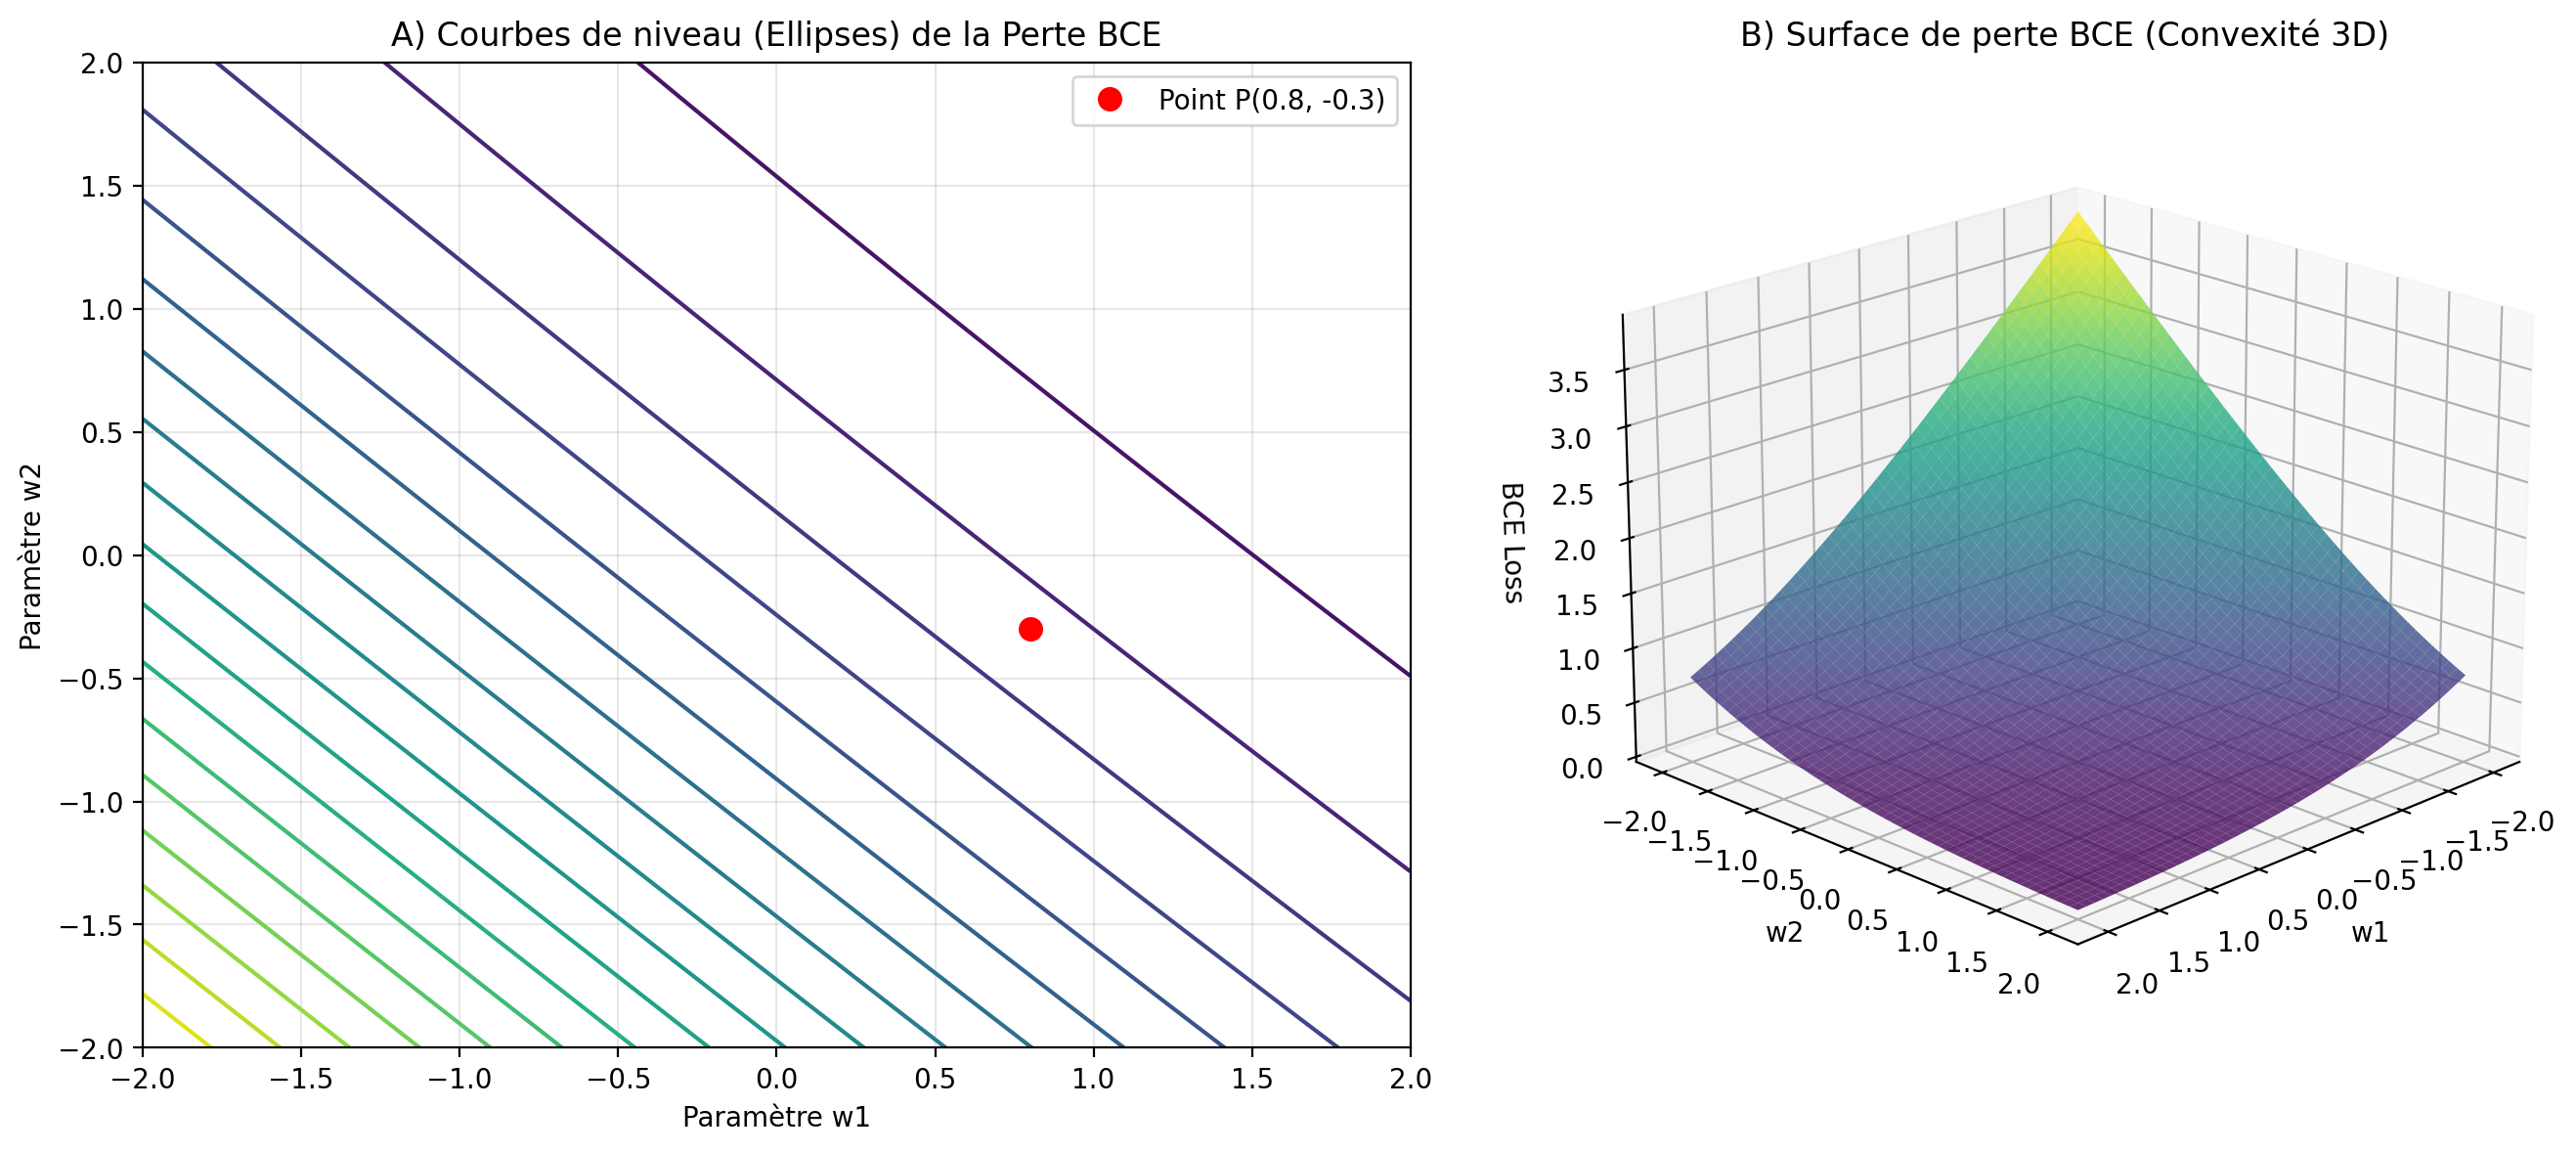

In [11]:
print("\n" + "="*60)
print("3a/3c) Visualisations des courbes de la fonction de perte")
print("="*60)

# Calcul de la perte BCE sur une grille de paramètres (w1, w2)
w1_range = np.linspace(-2, 2, 50)
w2_range = np.linspace(-2, 2, 50)
W1, W2 = np.meshgrid(w1_range, w2_range)
Loss = np.zeros_like(W1)

for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        z_temp = w0 + W1[i, j] * X1_norm + W2[i, j] * X2_norm
        y_hat_temp = sigmoid(z_temp)
        y_hat_temp = np.clip(y_hat_temp, epsilon, 1 - epsilon)
        Loss[i, j] = -np.mean(y_data * np.log(y_hat_temp) + 
                               (1 - y_data) * np.log(1 - y_hat_temp))

print("Surface de perte BCE calculée. Affichage des graphiques.")

# --- Visualisations ---
fig = plt.figure(figsize=(14, 6))

# Graphique 1: Contour plot de la surface de perte (Les ellipses)
ax1 = fig.add_subplot(1, 2, 1)
contour_levels = np.linspace(Loss.min(), Loss.max(), 20)
ax1.contour(W1, W2, Loss, levels=contour_levels, cmap='viridis')
ax1.plot(w1_point, w2_point, 'ro', markersize=8, label=f'Point P({w1_point}, {w2_point})')
ax1.set_xlabel('Paramètre w1')
ax1.set_ylabel('Paramètre w2')
ax1.set_title('A) Courbes de niveau (Ellipses) de la Perte BCE')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Graphique 2: Surface 3D de la perte BCE
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(W1, W2, Loss, cmap='viridis', alpha=0.8)
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.set_zlabel('BCE Loss')
ax2.set_title('B) Surface de perte BCE (Convexité 3D)')
ax2.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()


3d) ÉQUATION DE LA TANGENTE À LA COURBE DE NIVEAU (ELLIPSE)
Point P : w1=0.8, w2=-0.3
Vecteur Gradient ∇L(P) : (-0.369407, -0.369609)


1. Équation de la tangente (Forme vectorielle/normale) :
-0.369407*(w1 - 0.8) + -0.369609*(w2 - -0.3) = 0

2. Équation de la tangente (Forme w2 = a*w1 + b) :
w2 = -0.999451*w1 + 0.499561


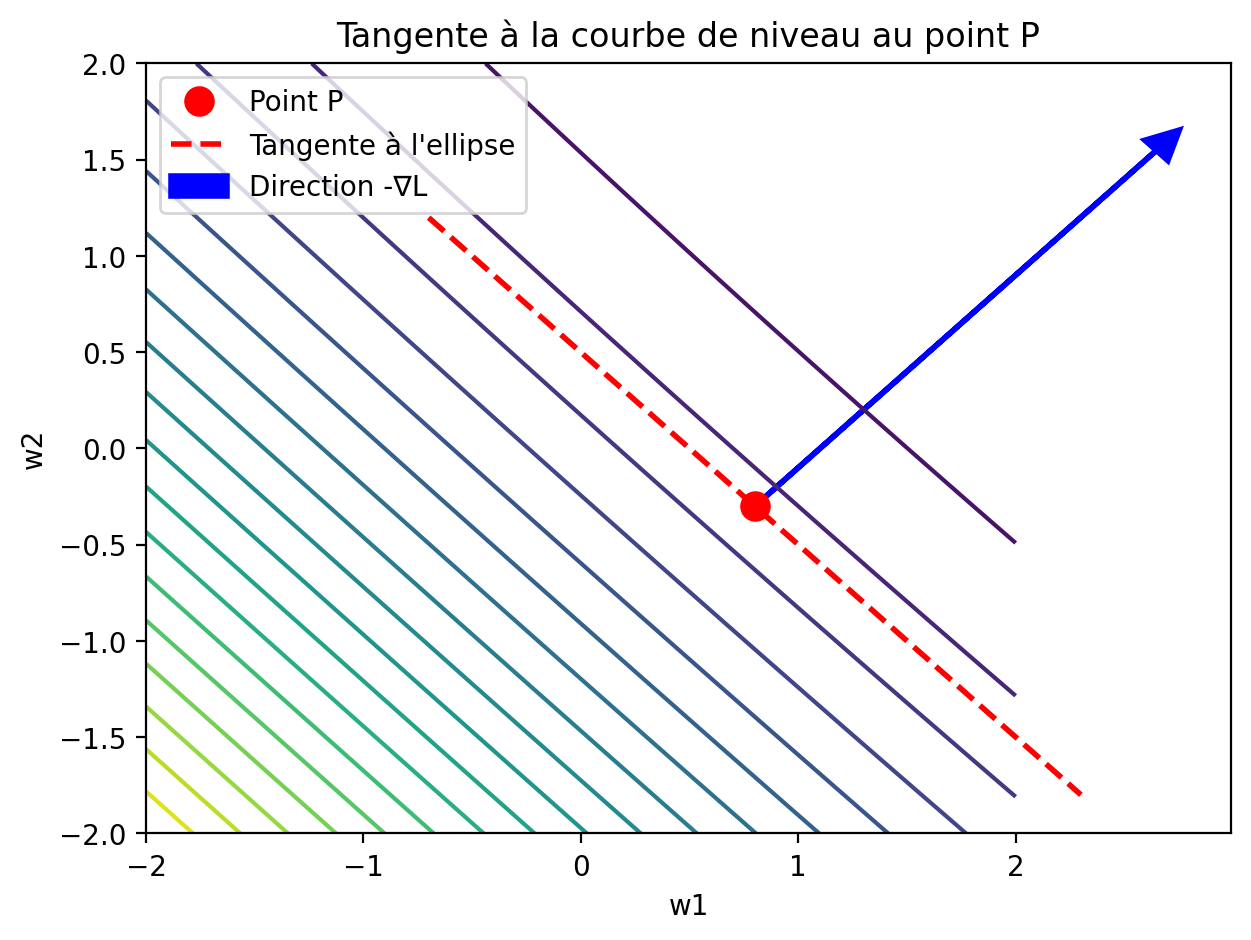

In [12]:
print("\n" + "="*60)
print("3d) ÉQUATION DE LA TANGENTE À LA COURBE DE NIVEAU (ELLIPSE)")
print("="*60)

# Le point P(w1_point, w2_point) est (0.8, -0.3)

# Calcul du Gradient (∂L/∂w1 et ∂L/∂w2) au point P
z_point = w0 + w1_point * X1_norm + w2_point * X2_norm
y_hat_point = sigmoid(z_point)

# Le gradient logistique par rapport à wj est : 1/n * Σ (ŷi - yi) * xji
grad_w1 = np.mean((y_hat_point - y_data) * X1_norm)
grad_w2 = np.mean((y_hat_point - y_data) * X2_norm)

print(f"Point P : w1={w1_point}, w2={w2_point}")
print(f"Vecteur Gradient ∇L(P) : ({grad_w1:.6f}, {grad_w2:.6f})")
print("\n")

# L'équation de la tangente à la courbe de niveau est perpendiculaire au gradient :
# grad_w1 * (w1 - w1_point) + grad_w2 * (w2 - w2_point) = 0

print("1. Équation de la tangente (Forme vectorielle/normale) :")
print(f"{grad_w1:.6f}*(w1 - {w1_point}) + {grad_w2:.6f}*(w2 - {w2_point}) = 0")

print("\n2. Équation de la tangente (Forme w2 = a*w1 + b) :")
if abs(grad_w2) > 1e-9:
    a = -grad_w1 / grad_w2
    # b est l'ordonnée à l'origine
    b = (grad_w1 * w1_point + grad_w2 * w2_point) / grad_w2
    print(f"w2 = {a:.6f}*w1 + {b:.6f}")
    
    # Visualisation de la tangente
    fig, ax = plt.subplots(figsize=(7, 5))
    # Réutilisation de la variable Loss de la Cellule 5
    contour_levels = np.linspace(Loss.min(), Loss.max(), 20)
    ax.contour(W1, W2, Loss, levels=contour_levels, cmap='viridis')
    ax.plot(w1_point, w2_point, 'ro', markersize=10, label=f'Point P')
    
    # Trace la ligne tangente
    w1_tangent = np.linspace(w1_point - 1.5, w1_point + 1.5, 10)
    w2_tangent = a * w1_tangent + b
    ax.plot(w1_tangent, w2_tangent, 'r--', linewidth=2, label='Tangente à l\'ellipse')
    
    # Représentation du vecteur -Gradient (direction de descente)
    # Multiplié par 5 pour une meilleure visibilité
    ax.arrow(w1_point, w2_point, -grad_w1*5, -grad_w2*5, 
             head_width=0.15, head_length=0.15, fc='blue', ec='blue', 
             linewidth=2, label='Direction -∇L')
    
    ax.set_title('Tangente à la courbe de niveau au point P')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.legend()
    plt.show()
else:
    print(f"w1 = {w1_point} (Le gradient est vertical, la tangente est horizontale)")
    
print("="*60)